In [62]:
import quandl
quandl.ApiConfig.api_key = "xZpH8Kq_aH3_h2xsaa49"
df = quandl.get("CHRIS/CME_ES2", api="xZpH8Kq_aH3_h2xsaa49")
df.head()
df.tail()
df.shape

(5986, 8)

In [63]:
# ! pip install --user talib

In [64]:
import talib as ta
df['EMA10'] = ta.EMA(df['Settle'].values, timeperiod=10)
df['EMA30'] = ta.EMA(df['Settle'].values, timeperiod=30)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Settle'].values, timeperiod=14)
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Settle'].values, timeperiod=14)
df['RSI'] = ta.RSI(df['Settle'].values, timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(df['Settle'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACDsignal'] = macdsignal
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
Date,,,,,,,,,,,,,,,
2021-03-15,3937.50,3960.25,3913.00,3956.75,25.50,3958.25,1962578.0,1074588.0,3888.845380,3854.728033,67.948613,15.367395,61.385366,22.341798,13.495622
2021-03-16,3957.75,3970.75,3942.75,3957.50,-5.75,3952.50,1963102.0,1872176.0,3900.418947,3861.035901,65.095140,14.628503,60.581439,26.192142,16.034926
2021-03-17,3957.25,3973.50,3925.00,3961.25,11.00,3963.50,1922176.0,2334286.0,3911.888230,3867.646488,63.909773,13.605031,61.617057,29.787800,18.785501
2021-03-18,3962.00,3978.50,3900.50,3910.50,-57.50,3906.00,2096466.0,2499994.0,3910.817642,3870.120909,64.916218,13.153586,53.678224,27.678555,20.564112
2021-03-19,3910.75,3923.50,3875.00,3896.75,-6.25,3899.75,1986486.0,2556702.0,3908.805344,3872.032463,63.743631,13.216574,52.880689,25.212012,21.493692


In [65]:
import numpy as np
df['ClgtEMA10'] = np.where(df['Settle'] > df['EMA10'], 1, -1)
df['EMA10gtEMA30'] = np.where(df['EMA10'] > df['EMA30'], 1, -1)
df['MACDSIGgtMACD'] = np.where(df['MACDsignal'] > df['MACD'], 1, -1)
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,,,,,,,,,,,,,
2021-03-15,3937.50,3960.25,3913.00,3956.75,25.50,3958.25,1962578.0,1074588.0,3888.845380,3854.728033,67.948613,15.367395,61.385366,22.341798,13.495622,1,1,-1
2021-03-16,3957.75,3970.75,3942.75,3957.50,-5.75,3952.50,1963102.0,1872176.0,3900.418947,3861.035901,65.095140,14.628503,60.581439,26.192142,16.034926,1,1,-1
2021-03-17,3957.25,3973.50,3925.00,3961.25,11.00,3963.50,1922176.0,2334286.0,3911.888230,3867.646488,63.909773,13.605031,61.617057,29.787800,18.785501,1,1,-1
2021-03-18,3962.00,3978.50,3900.50,3910.50,-57.50,3906.00,2096466.0,2499994.0,3910.817642,3870.120909,64.916218,13.153586,53.678224,27.678555,20.564112,-1,1,-1
2021-03-19,3910.75,3923.50,3875.00,3896.75,-6.25,3899.75,1986486.0,2556702.0,3908.805344,3872.032463,63.743631,13.216574,52.880689,25.212012,21.493692,-1,1,-1


In [66]:
df['Return'] = df['Settle'].pct_change(1).shift(-1)
df['target_cls'] = np.where(df.Return > 0, 1, 0)
df['target_rgs'] = df['Return']
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,...,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD,Return,target_cls,target_rgs
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-15,3937.50,3960.25,3913.00,3956.75,25.50,3958.25,1962578.0,1074588.0,3888.845380,3854.728033,...,15.367395,61.385366,22.341798,13.495622,1,1,-1,-0.001453,0,-0.001453
2021-03-16,3957.75,3970.75,3942.75,3957.50,-5.75,3952.50,1963102.0,1872176.0,3900.418947,3861.035901,...,14.628503,60.581439,26.192142,16.034926,1,1,-1,0.002783,1,0.002783
2021-03-17,3957.25,3973.50,3925.00,3961.25,11.00,3963.50,1922176.0,2334286.0,3911.888230,3867.646488,...,13.605031,61.617057,29.787800,18.785501,1,1,-1,-0.014507,0,-0.014507
2021-03-18,3962.00,3978.50,3900.50,3910.50,-57.50,3906.00,2096466.0,2499994.0,3910.817642,3870.120909,...,13.153586,53.678224,27.678555,20.564112,-1,1,-1,-0.001600,0,-0.001600
2021-03-19,3910.75,3923.50,3875.00,3896.75,-6.25,3899.75,1986486.0,2556702.0,3908.805344,3872.032463,...,13.216574,52.880689,25.212012,21.493692,-1,1,-1,NaN,0,NaN


In [67]:
df=df.dropna()

In [68]:
predictors_list = ['ATR', 'ADX','RSI', 'ClgtEMA10', 'EMA10gtEMA30', 'MACDSIGgtMACD']
X = df[predictors_list]
X.tail()

,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,
2021-03-12,69.540814,16.383850,59.153221,1,1,-1
2021-03-15,67.948613,15.367395,61.385366,1,1,-1
2021-03-16,65.095140,14.628503,60.581439,1,1,-1
2021-03-17,63.909773,13.605031,61.617057,1,1,-1
2021-03-18,64.916218,13.153586,53.678224,-1,1,-1


In [69]:
y_cls = df.target_cls
y_cls.tail()

Date
2021-03-12    1
2021-03-15    0
2021-03-16    1
2021-03-17    0
2021-03-18    0
Name: target_cls, dtype: int64

In [70]:
y_rgs = df.target_rgs
y_rgs.tail()

Date
2021-03-12    0.006484
2021-03-15   -0.001453
2021-03-16    0.002783
2021-03-17   -0.014507
2021-03-18   -0.001600
Name: target_rgs, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
y=y_cls
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

print (X_cls_train.shape, y_cls_train.shape)
print (X_cls_test.shape, y_cls_test.shape)

(1241, 6) (1241,)
(533, 6) (533,)


In [72]:
train_length = int(len(df)*0.70)
X_rgs_train = X[:train_length]
X_rgs_test = X[train_length:]
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]

print (X_rgs_train.shape, y_rgs_train.shape)
print (X_rgs_test.shape, y_rgs_test.shape)

(1241, 6) (1241,)
(533, 6) (533,)


In [73]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [74]:
clf = clf.fit(X_cls_train, y_cls_train)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [77]:
y_cls_pred = clf.predict(X_cls_test)

In [78]:
from sklearn.metrics import classification_report
report = classification_report(y_cls_test, y_cls_pred)
print(report)

              precision    recall  f1-score   support

           0       0.38      0.10      0.15       242
           1       0.54      0.87      0.66       291

    accuracy                           0.52       533
   macro avg       0.46      0.48      0.41       533
weighted avg       0.46      0.52      0.43       533



In [79]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf = 200)

In [80]:
dtr.fit(X_rgs_train, y_rgs_train)

DecisionTreeRegressor(min_samples_leaf=200)

In [86]:
from bs4 import BeautifulSoup
import datetime
import json
import numpy as np
import pandas as pd
import requests
import time
import warnings
warnings.simplefilter('ignore')

import talib as ta
from talib import MA_Type

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

In [87]:
# Dow_Page = requests.get('https://www.cnbc.com/dow-30/')
# Dow_Content = Dow_Page.content

# soup = BeautifulSoup(Dow_Content)

# data = list(soup.findAll("td",{"class":"Py(10px) Ta(start) Pend(10px)"}))

In [88]:
# Ticker_List = []
# for i in data:
#     TempData = str(i)
#     if "title" in TempData:
#         TempData = TempData[TempData.find("title"):]
#         TempData = TempData[TempData.find(">")+1:TempData.find("<")]
#         Ticker_List.append(TempData)
#     else:
#         continue

In [89]:
# Start_Date = int(time.mktime((2014,10,28,4,0,0,0,0,0)))
# End_Date = int(time.mktime((2019,10,28,4,0,0,0,0,0)))

In [90]:
# for i in Ticker_List:
#     ScrapeYahoo(Stock_Data, i, Start_Date, End_Date)
#     #print(i + " done")
#     time.sleep(0.5)

In [91]:
# for i in Ticker_List:
    
#     Stock_Data[i]['High Shifted']=Stock_Data[i]['High'].shift(1)
#     Stock_Data[i]['Low Shifted'] = Stock_Data[i]['Low'].shift(1)
#     Stock_Data[i]['Close Shifted'] = Stock_Data[i]['Close'].shift(1)
    
#     Stock_Data[i]['Upper BBand'], Stock_Data[i]['Middle BBand'],Stock_Data[i]['Lower BBand']= ta.BBANDS(Stock_Data[i]['Close Shifted'],
#                                                                                                        timeperiod=20,)
    
#     Stock_Data[i]['RSI'] = ta.RSI(np.array(Stock_Data[i]['Close Shifted']), timeperiod=14)

#     Stock_Data[i]['Macd'], Stock_Data[i]['Macd Signal'],Stock_Data[i]['Macd Hist'] = ta.MACD(Stock_Data[i]['Close Shifted'], fastperiod=12, slowperiod=26, 
#                                                                signalperiod=9)

#     Stock_Data[i]['Momentum'] = ta.MOM(Stock_Data[i]['Close Shifted'],timeperiod=12)
    
#     Stock_Data[i]['Returns'] = np.log(Stock_Data[i]['Open']/Stock_Data[i]['Open'].shift(1)) 


In [92]:
from pandas_datareader import data as pdr

In [93]:
stock_AAPL=pdr.get_data_yahoo('AAPL', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(180), interval='d')
stock_MSFT=pdr.get_data_yahoo('MSFT',datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(180), interval='d')
stock_F=pdr.get_data_yahoo('F', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(180), interval='d')
stock_T=pdr.get_data_yahoo('T', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(180), interval='d')
# stock_AAPL, metadata = ts.get_daily_adjusted('AAPL', outputsize='full')
# stock_MSFT, metadata = ts.get_daily_adjusted('MSFT', outputsize='full')
# stock_F, metadata = ts.get_daily_adjusted('F', outputsize='full')
# stock_T, metadata = ts.get_daily_adjusted('T', outputsize='full')
stock_T

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-22,40.990002,40.549999,40.919998,40.910000,17672700.0,29.188936
2016-08-23,41.029999,40.779999,40.990002,40.849998,15053500.0,29.146126
2016-08-24,40.990002,40.599998,40.900002,40.869999,16168900.0,29.160387
2016-08-25,41.180000,40.750000,40.869999,41.070000,16903700.0,29.303095
2016-08-26,41.290001,40.599998,41.130001,40.680000,17859500.0,29.024839
...,...,...,...,...,...,...
2021-08-09,28.000000,27.809999,27.969999,27.850000,25196000.0,26.775627
2021-08-10,28.110001,27.770000,27.820000,28.090000,22260400.0,27.006367
2021-08-11,28.219999,28.020000,28.080000,28.160000,20500700.0,27.073666


In [94]:
df_AAPL = pd.DataFrame(stock_AAPL)
df_MSFT = pd.DataFrame(stock_MSFT)
df_F = pd.DataFrame(stock_F)
df = pd.DataFrame(stock_F)

In [95]:
import talib as ta
df['EMA10'] = ta.EMA(df['Adj Close'].values, timeperiod=10)
df['EMA30'] = ta.EMA(df['Adj Close'].values, timeperiod=30)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Adj Close'].values, timeperiod=14)
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Adj Close'].values, timeperiod=14)
df['RSI'] = ta.RSI(df['Adj Close'].values, timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(df['Adj Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACDsignal'] = macdsignal
df.tail()

,High,Low,Open,Close,Volume,Adj Close,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
Date,,,,,,,,,,,,,
2021-08-09,13.82,13.55,13.72,13.75,38760400.0,13.611132,13.683037,13.893782,0.489483,16.910432,45.951380,-0.163840,-0.154117
2021-08-10,13.91,13.66,13.77,13.82,32120800.0,13.680425,13.682562,13.880017,0.475867,16.983000,47.056421,-0.154045,-0.154103
2021-08-11,13.95,13.67,13.86,13.93,42795600.0,13.789314,13.701971,13.874165,0.461877,16.937814,48.827005,-0.135929,-0.150468
2021-08-12,14.05,13.79,13.92,13.90,38547900.0,13.759617,13.712452,13.866775,0.447506,16.607214,48.352069,-0.122556,-0.144886
2021-08-13,13.95,13.54,13.88,13.59,44915500.0,13.452748,13.665233,13.840064,0.444827,16.835834,43.629544,-0.135161,-0.142941


In [96]:
df['Returns']=df['Adj Close'].pct_change()

In [97]:
df['Signal']=np.sign(df.Returns - pow(10,-100))

In [98]:
df=df.drop(['Low','High','Open','Close'],1)

In [99]:
max_abs_scaler = preprocessing.MaxAbsScaler()

Model_Dict = {}
df.dropna(inplace=True)
    
X = np.array(df.drop(['Signal','Returns'],1))
X = max_abs_scaler.fit_transform(X)
Y = np.array(df['Signal'])


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test

model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred


#print("SVM Model Info for Ticker: "+i)
#print("Accuracy:",metrics.accuracy_score(Model_Dict[i]['Y Test'], Model_Dict[i]['Y Prediction']))
Model_Dict['Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
#print("Precision:",metrics.precision_score(Model_Dict[i]['Y Test'], Model_Dict[i]['Y Prediction'],pos_label=str(1),average="macro"))
Model_Dict['Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=str(1),average="macro")
#print("Recall:",metrics.recall_score(Model_Dict[i]['Y Test'], Model_Dict[i]['Y Prediction'],pos_label=str(1),average="macro"))
Model_Dict['Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=str(1),average="macro")
#print("#################### \n")

In [100]:

    
prediction_length = len(Model_Dict['Y Prediction'])

df['SVM Signal'] = 0
df['SVM Returns'] = 0
df['Total Strat Returns'] = 0
df['Market Returns'] = 0

Signal_Column = df.columns.get_loc('SVM Signal')
Strat_Column = df.columns.get_loc('SVM Returns')
Return_Column = df.columns.get_loc('Total Strat Returns')
Market_Column = df.columns.get_loc('Market Returns')

df.iloc[-prediction_length:,Signal_Column] = list(map(int,Model_Dict['Y Prediction']))
df['SVM Returns'] = df['SVM Signal'] *df['Returns'].shift(1)

df.iloc[-prediction_length:,Return_Column] = np.nancumsum(df['SVM Returns'][-prediction_length:])
df.iloc[-prediction_length:,Market_Column] = np.nancumsum(df['Returns'][-prediction_length:])

df['Sharpe_Ratio'] = (df['Total Strat Returns'][-1] - df['Market Returns'][-1])/np.nanstd(df['Total Strat Returns'][-prediction_length:])

In [101]:
df

,Volume,Adj Close,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,Returns,Signal,SVM Signal,SVM Returns,Total Strat Returns,Market Returns,Sharpe_Ratio
Date,,,,,,,,,,,,,,,,
2016-10-07,22093200.0,9.788549,9.741699,9.807872,2.592415,15.682958,52.272224,-0.049774,-0.107567,-0.008071,-1.0,0,NaN,0.000000,0.000000,-6.404377
2016-10-10,24951400.0,9.653149,9.725599,9.797890,2.592346,14.594890,46.775813,-0.052785,-0.096610,-0.013833,-1.0,0,-0.000000,0.000000,0.000000,-6.404377
2016-10-11,40053500.0,9.549607,9.693601,9.781872,2.586954,14.614962,43.048122,-0.062803,-0.089849,-0.010726,-1.0,0,-0.000000,0.000000,0.000000,-6.404377
2016-10-12,20627000.0,9.525716,9.663076,9.765346,2.577914,14.633600,42.212192,-0.071841,-0.086247,-0.002502,-1.0,0,-0.000000,0.000000,0.000000,-6.404377
2016-10-13,39904200.0,9.485891,9.630861,9.747317,2.564083,15.799202,40.790306,-0.081280,-0.085254,-0.004181,-1.0,0,-0.000000,0.000000,0.000000,-6.404377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-09,38760400.0,13.611132,13.683037,13.893782,0.489483,16.910432,45.951380,-0.163840,-0.154117,-0.003623,-1.0,1,0.006565,0.179085,0.848953,-6.404377
2021-08-10,32120800.0,13.680425,13.682562,13.880017,0.475867,16.983000,47.056421,-0.154045,-0.154103,0.005091,1.0,-1,0.003623,0.182708,0.854044,-6.404377
2021-08-11,42795600.0,13.789314,13.701971,13.874165,0.461877,16.937814,48.827005,-0.135929,-0.150468,0.007960,1.0,1,0.005091,0.187799,0.862004,-6.404377


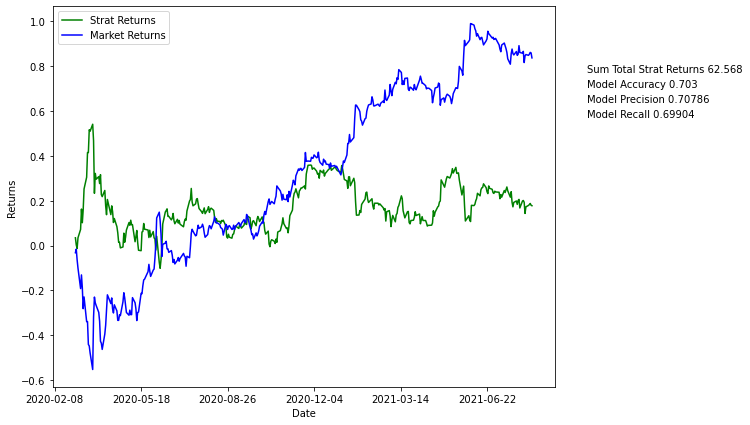

In [102]:

fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(df[-prediction_length:].index.values,
        df['Total Strat Returns'][-prediction_length:].values, color='g', label="Strat Returns")

ax.plot(df[-prediction_length:].index.values,
        df['Market Returns'][-prediction_length:].values, color='b', label="Market Returns")

ax.set(xlabel= "Date",ylabel="Returns")
#plt.title(i,fontsize=15)
ax.xaxis.set_major_locator(ticker.AutoLocator())

#plt.figtext(.95,0.78, s="Sharpe Ratio "+'{0:.5g}'.format(Model_Dict['Sharpe_Ratio']))
plt.figtext(.95,0.75, s="Sum Total Strat Returns "+'{0:.5g}'.format(df['Total Strat Returns'].sum()))
plt.figtext(.95,0.72,s="Model Accuracy " +'{0:.5g}'.format(Model_Dict['Accuracy']))
plt.figtext(.95,0.69,s="Model Precision " +'{0:.5g}'.format(Model_Dict['Precision']))
plt.figtext(.95,0.66,s="Model Recall " +'{0:.5g}'.format(Model_Dict['Recall']))

plt.legend(loc='best')
plt.show()

In [103]:
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2018, 1, 1)

tickers = ['AAPL', 'ADBE', 'ORCL', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM', 'SPY']
df = pdr.get_data_yahoo(tickers, start, end)['Close']
df.tail()

Symbols,AAPL,ADBE,ORCL,EBAY,MSFT,QCOM,HPQ,JNPR,AMD,IBM,SPY
Date,,,,,,,,,,,
2017-12-22,43.752499,175.000000,47.360001,37.759998,85.510002,64.730003,21.26,28.860001,10.54,145.793503,267.510010
2017-12-26,42.642502,174.440002,47.430000,37.939999,85.400002,64.300003,21.23,28.860001,10.46,146.108994,267.190002
2017-12-27,42.650002,175.360001,47.380001,37.610001,85.709999,64.540001,21.27,28.879999,10.53,146.395798,267.320007
2017-12-28,42.770000,175.550003,47.520000,37.919998,85.720001,64.379997,21.15,28.870001,10.55,147.265778,267.869995
2017-12-29,42.307499,175.240005,47.279999,37.740002,85.540001,64.019997,21.01,28.500000,10.28,146.673035,266.859985


In [104]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [105]:
from statsmodels.tsa.stattools import coint, adfuller

[('AAPL', 'SPY'), ('ADBE', 'EBAY'), ('ADBE', 'MSFT'), ('ORCL', 'HPQ')]


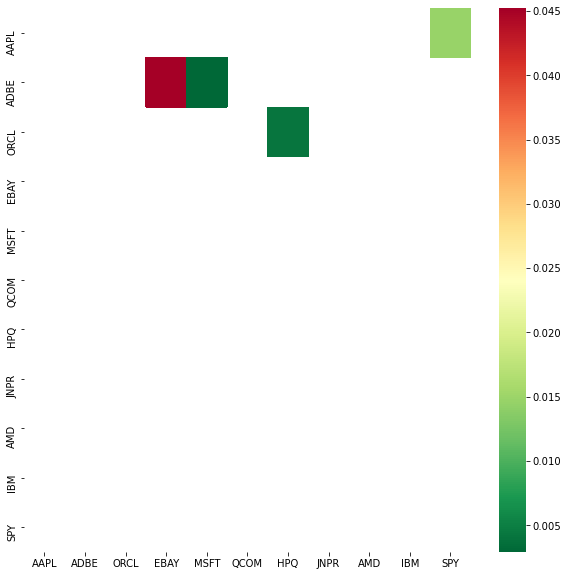

In [106]:

# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs(df)
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

In [107]:
S1 = df['ADBE']
S2 = df['MSFT']

score, pvalue, _ = coint(S1, S2)
pvalue, score

(0.0029504297644151745, -4.260283986350992)

In [108]:
import statsmodels
import statsmodels.api as sm

In [109]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['ADBE']
b = results.params['ADBE']

In [110]:
b

0.39992642792282795

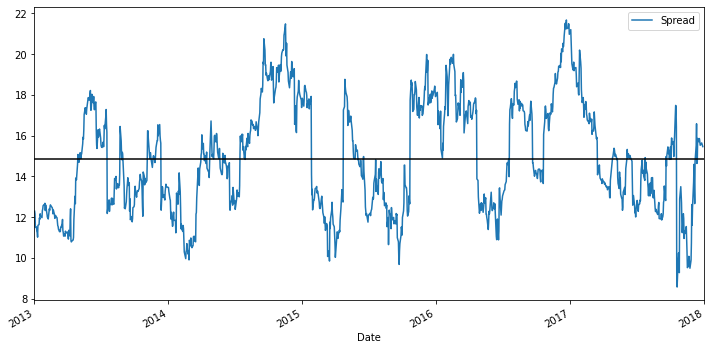

In [111]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['ADBE']
b = results.params['ADBE']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread']);

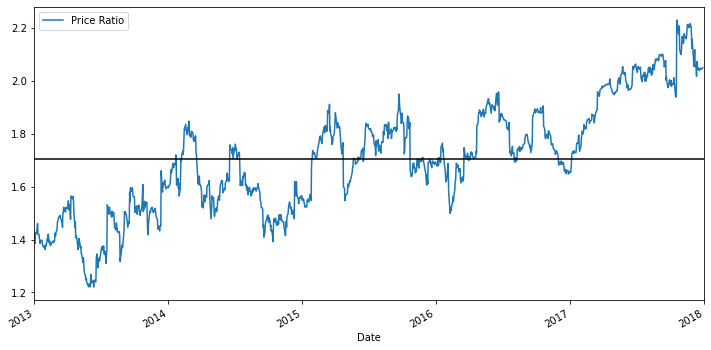

In [112]:

ratio = S1/S2
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio']);

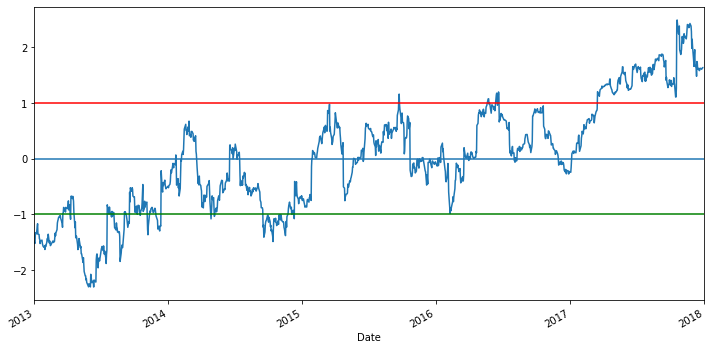

In [113]:

def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.show()

In [114]:
ratios = df['ADBE'] / df['MSFT'] 
print(len(ratios) * .70 )

881.3


In [115]:
train = ratios[:881]
test = ratios[881:]

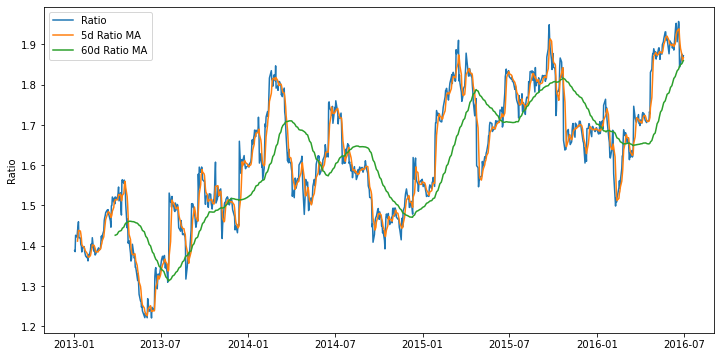

In [116]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

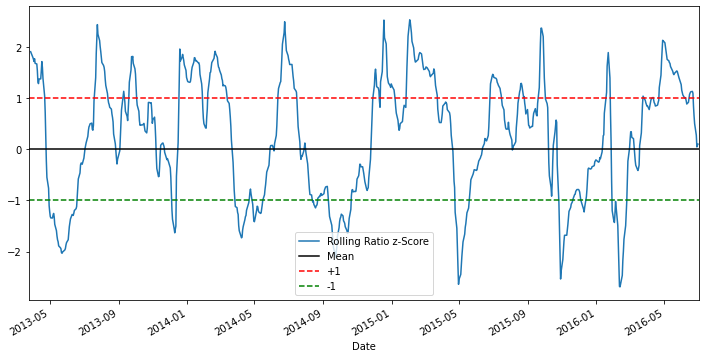

In [117]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.xlim('2013-03-25', '2016-07-01')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

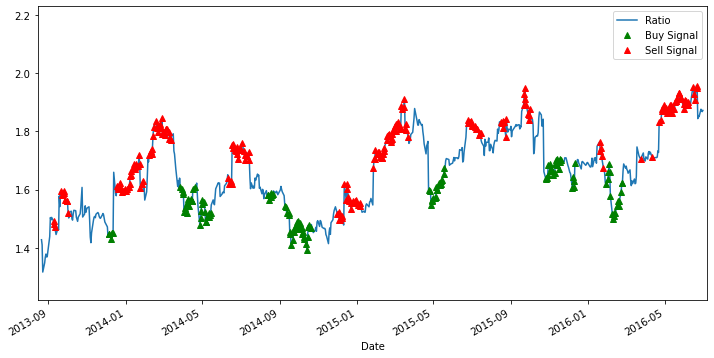

In [118]:
plt.figure(figsize=(12,6))

train[160:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.xlim('2013-08-15','2016-07-07')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

In [119]:
c=1
for i in sell:
    if i>0: 
        c+=1
c

315

In [120]:
c=1
for i in buy:
    if i>0: 
        c+=1
c

227

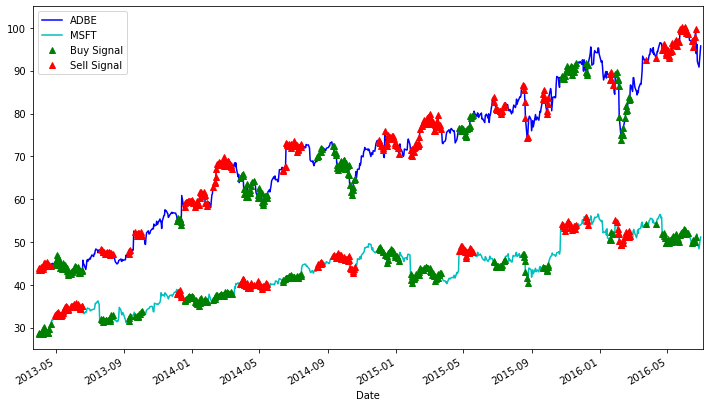

In [121]:
plt.figure(figsize=(12,7))
S1 = df['ADBE'].iloc[:881]
S2 = df['MSFT'].iloc[:881]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.ylim(25, 105)
plt.xlim('2013-03-22', '2016-07-04')

plt.legend(['ADBE', 'MSFT', 'Buy Signal', 'Sell Signal'])
plt.show()

In [122]:
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money

In [123]:
trade(df['ADBE'].iloc[881:], df['MSFT'].iloc[881:], 60, 5)

451.8561468487711